In [1]:
# FATMA EREM AKSOY - 2315075

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Setup A

Sample data is loaded to a `numpy` 2d-array. Then its SVD is calculated and singular values are plotted. 

(2034, 2034) (2034,) (2034, 26576)


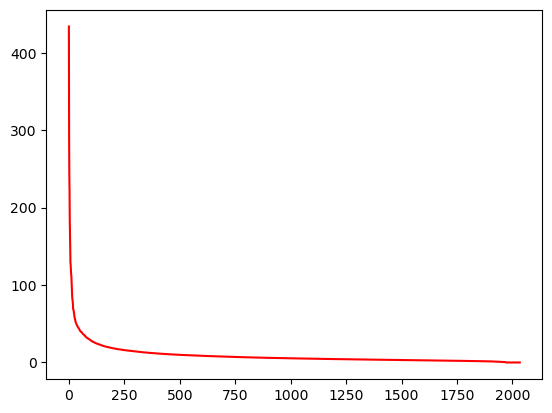

In [5]:
countvectorizer = CountVectorizer(stop_words='english')
countvectors = countvectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
countvectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape
U, s, Vh = linalg.svd(countvectors, full_matrices=False)
print(U.shape, s.shape, Vh.shape)
plt.plot(s, color='red');


## Question 1
Create a matrix of the same size whose entries are uniformly distributed between 0 and 1 (you can use `np.random.uniform` to create such a matrix). Calculate its SVD. Plot its singular values. Compare the singular values with the singular values by making a graph (make original singular values `red` and singular values for uniformly distributed matrix `blue`.)

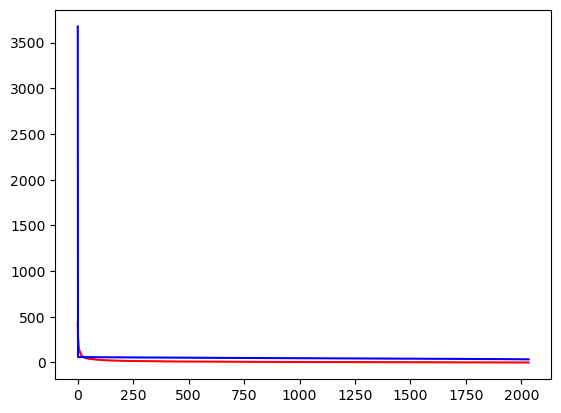

In [7]:
matrix_uni = np.random.uniform(0, 1, size=countvectors.shape)
U_uni, s_uni, Vh_uni = linalg.svd(matrix_uni, full_matrices=False)
plt.plot(s, color='red');
plt.plot(s_uni, color='blue');


## Question 2
Randomly permute the contents of the matrix `vectors`. Calculate its SVD. Compare these singular values with earlier singular values by making a graph (make original singular values `red`, singular values for uniformly distributed matrix `blue` and singular values for randomly permuted matrix by `green`.)

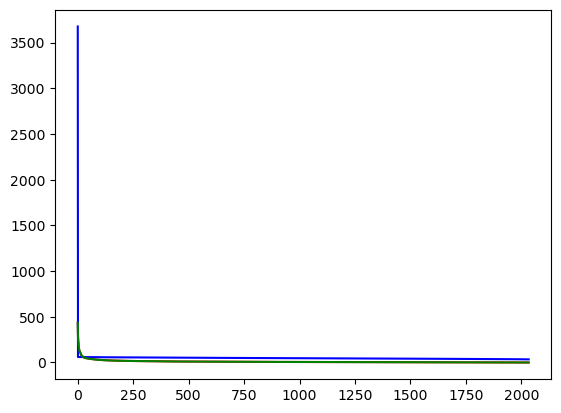

In [9]:
matrix_perm = countvectors[np.random.permutation(countvectors.shape[0])]
U_perm, s_perm, Vh_perm = linalg.svd(matrix_perm, full_matrices=False)
plt.plot(s, color='red');
plt.plot(s_uni, color='blue');
plt.plot(s_perm, color='green');


## Question 3
In the comparison graph make the vertical axis, make the vertical axis logarithmic.

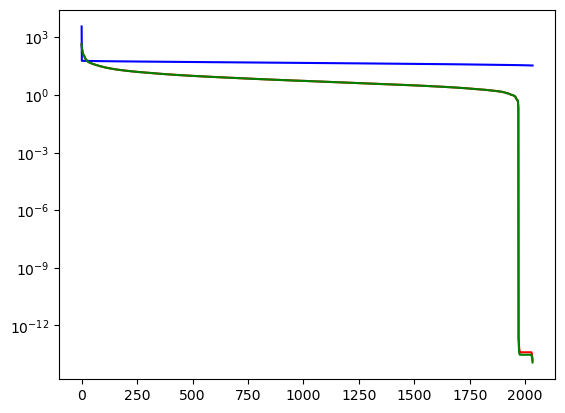

In [10]:
plt.plot(s, color='red');
plt.plot(s_uni, color='blue');
plt.plot(s_perm, color='green');
plt.yscale('log');

## Setup B


In [11]:
from PIL import Image
im = Image.open("Humphrey-Bogart.jpg")

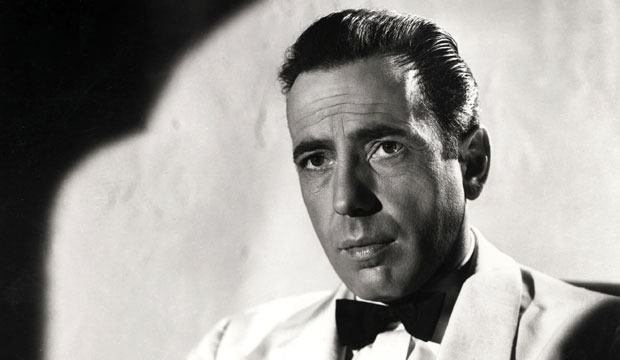

In [12]:
im

In [13]:
# Convert the image to numpy array
arr = np.asarray(im)
print(arr.shape)
# The original image althought it is black and white, it is represented as an RGB image.
# The array `arr` is 3-dimensional.
# Convert it to be black and white. Array `a` is 2-dimensional
a = np.mean(arr, axis=2)
print(a.shape)

(360, 620, 3)
(360, 620)


In [14]:
U, s, Vh = linalg.svd(a, full_matrices=False)

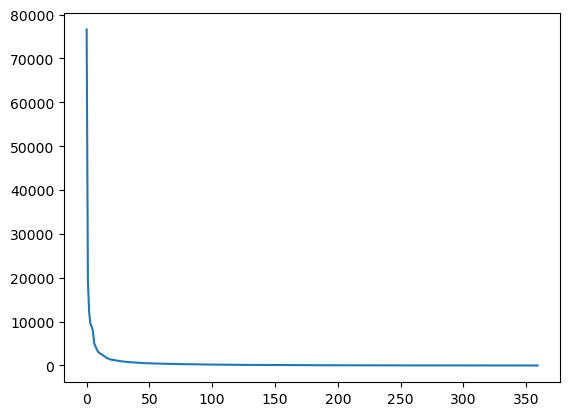

In [15]:
plt.plot(s);

## Question 4
Why does this graph of singular values resemble the graph of singular values in Question 1?

### ANSWER FOR QUESTION 4: The graph of singular values in Question 1 and Question 4 resemble because they both use the same method, SVD, to decompose a matrix. So even though the contexts used (sample data and image matrix) are different, the underlying SVD process cause the similar patterns so very similar graphs of singular values.

In [16]:
# Convert `a` to an PIL Image to display as an image.
im2 = Image.fromarray(np.uint8(a))
im2

## Question 5
Reconstruct an image using first 25 singular values using the matrices `U`, `s` and `Vh`.

What are some differences between the original image and the new reconstructed image?

### ANSWER FOR QUESTION 5: The differences between the original image and the new reconstructed image can be listed as: loss in detail (as we use only limited number of singular values, some details in the original image may be lost and the reconstructed image can result in more blurred or less detailed than the original one), change in colors (as limited amount of singular values are used, there might be color differences if the original image has slight variations of colors/shades).

In [19]:
n = 25  # amount of singular values to use

# picking the first n singular values and generating the matrices U, s and Vh
U_rec = U[:, :n]
s_rec = np.diag(s[:n])
Vh_rec = Vh[:n, :]

# reconstructing the image
rec_image = U_rec @ s_rec @ Vh_rec

# converting the reconstructed image array to an PIL Image
rec_image = Image.fromarray(np.uint8(rec_image))

# displaying both the original and the reconstructed images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray');
plt.title('Original Image');
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(rec_image, cmap='gray');
plt.title('Reconstructed Image (for n=25)');
plt.axis('off');


## Question 6
Reconstruct an image using singular values after the first 25 using the matrices `U`, `s` and `Vh`.

What are some differences between the original image and the new reconstructed image?

If you combine the images in Question 5 and Question 6, do you get the original image back?

### ANSWER FOR QUESTION 6: The differences between the original image and the new reconstructed image can be listed as: loss in detail (using only limited number of singular values, the ones after the first 25, will lead to having less details compared to the original image), image quality (as less number of singular values are used, the quality might be lower than the original image, meaning that it would result a more blurred or less sharp reconstructed image).

#### And no, combining the images in Question 5 and Question 6 would not bring the original image back. This is because the combination of these images will not have all the singular values required to properly represent the original image, which results in loss of information for the original image.

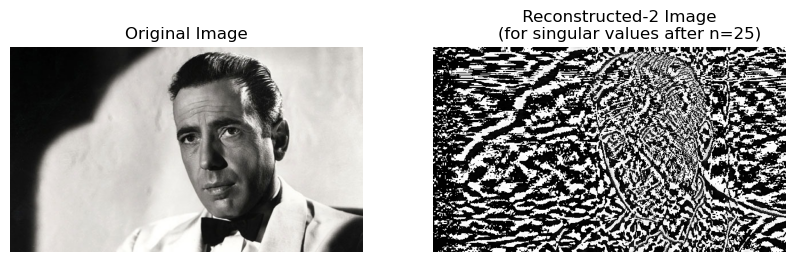

In [20]:
n = 25  # amount of singular values to use

# picking the first n singular values and generating the matrices U, s and Vh
U_rec2 = U[:, n:]
s_rec2 = np.diag(s[n:])
Vh_rec2 = Vh[n:, :]

# reconstructing the image
rec2_image = U_rec2 @ s_rec2 @ Vh_rec2

# converting the reconstructed image array to an PIL Image
rec2_image = Image.fromarray(np.uint8(rec2_image))

# displaying both the original and the reconstructed images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray');
plt.title('Original Image');
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(rec2_image, cmap='gray');
plt.title('''     Reconstructed-2 Image 
        (for singular values after n=25)''');
plt.axis('off');


## Setup C
We add some noise to the original image.

In [21]:
noisy_a = a + np.random.normal(scale=10, size=a.shape)
noisy_im = Image.fromarray(np.uint8(noisy_a))
noisy_im

## Question 7

Calculate the SVD for the noisy image `noisy_im`. Reconstruct and approximation using the first `k` singular vector. What is the effect of changing `k`? What is the effect of this operation?

### ANSWER FOR QUESTION 7: The effects of changing k value can be listed as: change in sharpness of images (using small values for k to reconstruct the images leads to loss of information so less sharp or more blurred images and increasing the k value will result in the opposite way), information loss in the images (small value of k may result in more loss of information as the singular values used are small so the reconstruction is done with less amount of values compared to the original image), noise (using high values for k leads to more noisy images in the reconstructed image and decreasing the k results in lower level of noise in the reconstructed images).

#### The effect of this operation is to achieve different levels of image quality and noise reduction by adjusting the k value accordingly, and finding the one that is the most balanced one in terms of both aspects.

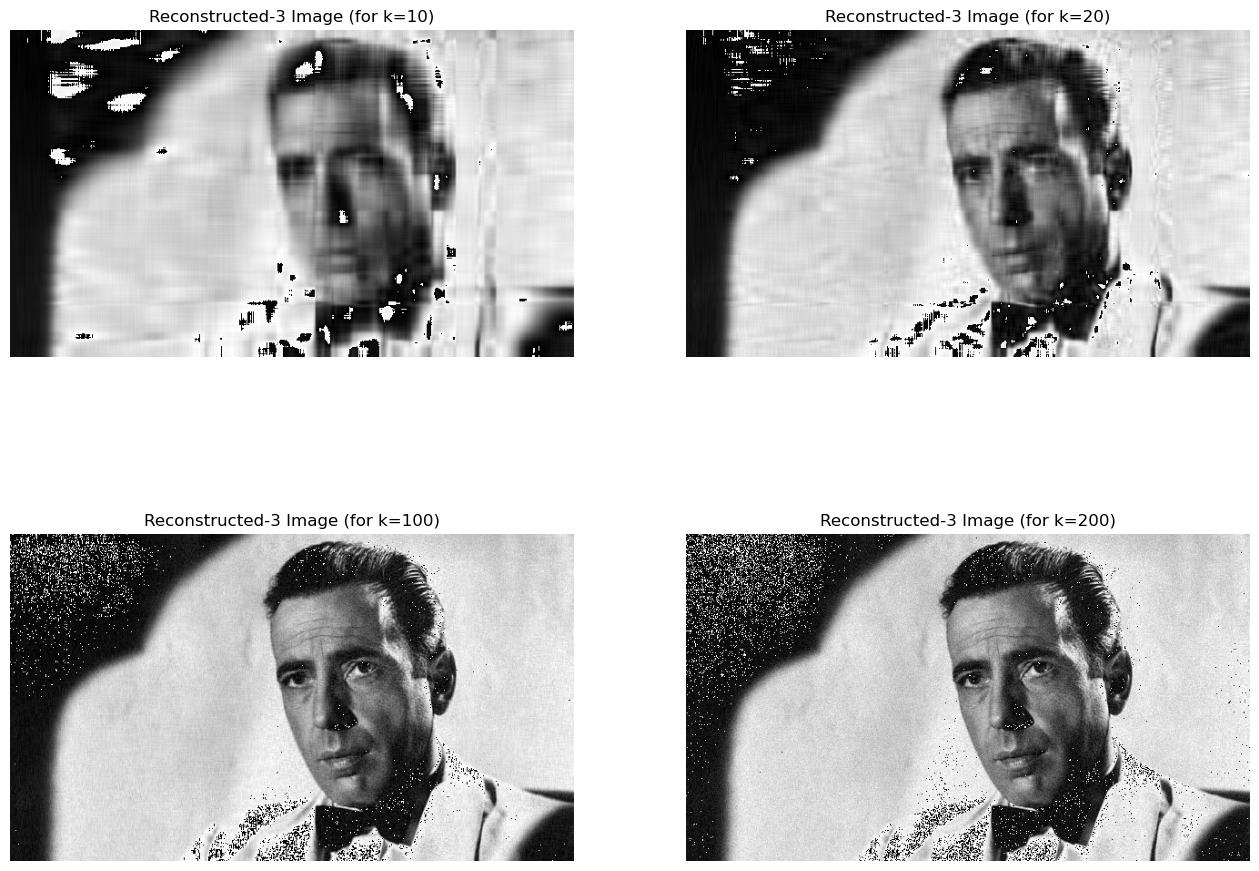

In [23]:
# calculating the SVD of the noisy image
U_noisy, s_noisy, Vh_noisy = linalg.svd(noisy_a, full_matrices=False)

# k vector holding the first k values to use for the reconstruction
k_vector = [10, 20, 100, 200]

# displaying the images for different k value reconstructions
plt.figure(figsize=(16, 12))
for i, k in enumerate(k_vector):
    plt.subplot(2, 2, i+1)
    rec3_a =  U_noisy[:, :k] @ np.diag(s_noisy[:k]) @ Vh_noisy[:k, :]
    rec3_image = Image.fromarray(np.uint8(rec3_a))
    plt.imshow(rec3_image, cmap='gray');
    plt.title(f'Reconstructed-3 Image (for k={k})');
    plt.axis('off');
    
